# Mini project: Avocados

In [5]:
import os

os.chdir("c:\\Users\\cbeer\\Desktop\\data-science-learning\\python-for-machine-learning")

os.getcwd()

'c:\\Users\\cbeer\\Desktop\\data-science-learning\\python-for-machine-learning'

## Step 1 load data

In [17]:
import pandas as pd 

dat = pd.read_csv("dat\\avocado.csv\\avocado.csv")

len(dat.dropna()) == len(dat) # no missing values

dat.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Step 2 Feature extraction

- Exclude region and date

In [18]:
dat = dat.drop(['Unnamed: 0', 'Date', 'region'], axis = 1)

dat.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


## Step 3 Preprocessing

In [20]:
## Encoding

from sklearn.preprocessing import LabelEncoder

dat['type'] = LabelEncoder().fit_transform(dat['type'])

dat['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int64

In [36]:
## asign input attributes and outputs

y = dat.iloc[:,1]

x = dat.iloc[:, 1:len(dat.columns)]

In [37]:
## Scaling features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scale = scaler.fit_transform(x)

len(x_scale)



18249

## Step 4 Split data

In [38]:
## splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_test, y_test, test_size=0.5)


## Step 5 train KNN



In [42]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=8)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9748298214611965

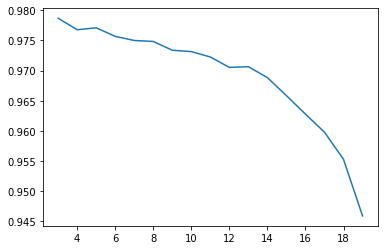

In [54]:
## Optimize on K

def train_knn():

    scores = pd.DataFrame(columns = ("k", "score"), index=range(3, 20))

    for k in range(3,20):

        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)

        score = model.score(x_test, y_test)

        scores.loc[k].k = k

        scores.loc[k].score = score

    return(scores)

scores = train_knn()

from matplotlib import pyplot as plt

plt.plot('k', 'score', data = scores)


## Interesting - score consistently decreases with k


In [55]:
## Which model is best??

scores[scores['score'] == max(scores['score'])]

,k,score
3,3,0.978683


In [58]:
model = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)

r_sq = model.score(x_val, y_val)

print('our best model has an r_squared of ' + str(round(r_sq, 2)))


our best model has an r_squared of 0.96
